Q1. Perform an initial exploration of the Iris dataset. Summarize the dataset by identifying the number of  observations, features, and classes. What are the basic descriptive statistics (mean, median, min, max)  for each feature?


Dataset Summary:
Number of observations: 150
Number of features: 4
Number of classes (species): 3
Classes: ['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Descriptive Statistics (mean, median, min, max, etc.):
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.3000

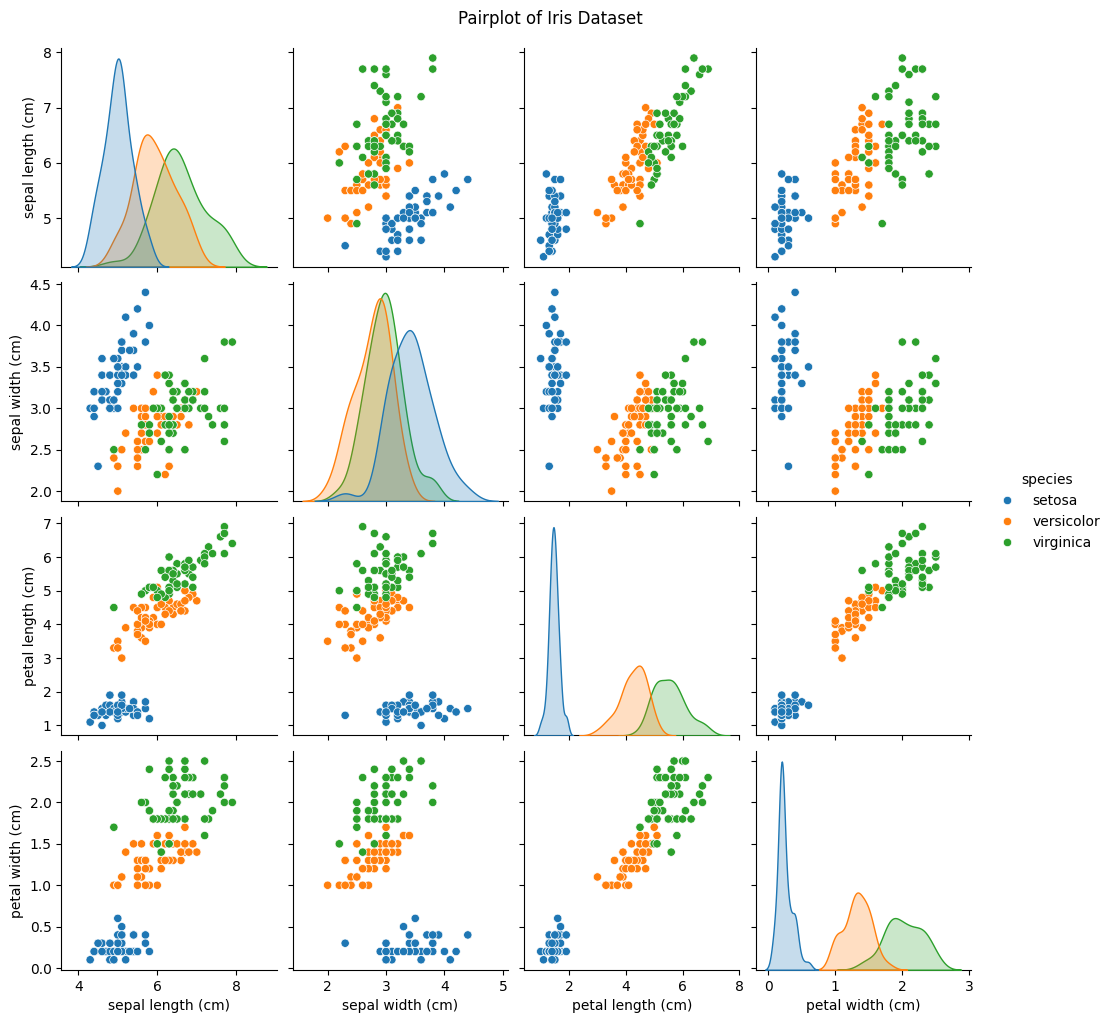

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Dataset Summary:")
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of classes (species): {df['species'].nunique()}")
print(f"Classes: {df['species'].unique()}")
print("\nDescriptive Statistics (mean, median, min, max, etc.):")
print(df.describe())
print("\nClass Distribution:")
print(df['species'].value_counts())
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


Q2.  Use a pairplot to visualize the relationships between all features of the Iris dataset. How do the features  sepal length, sepal width, petal length, and petal width correlate with each other across  different species?


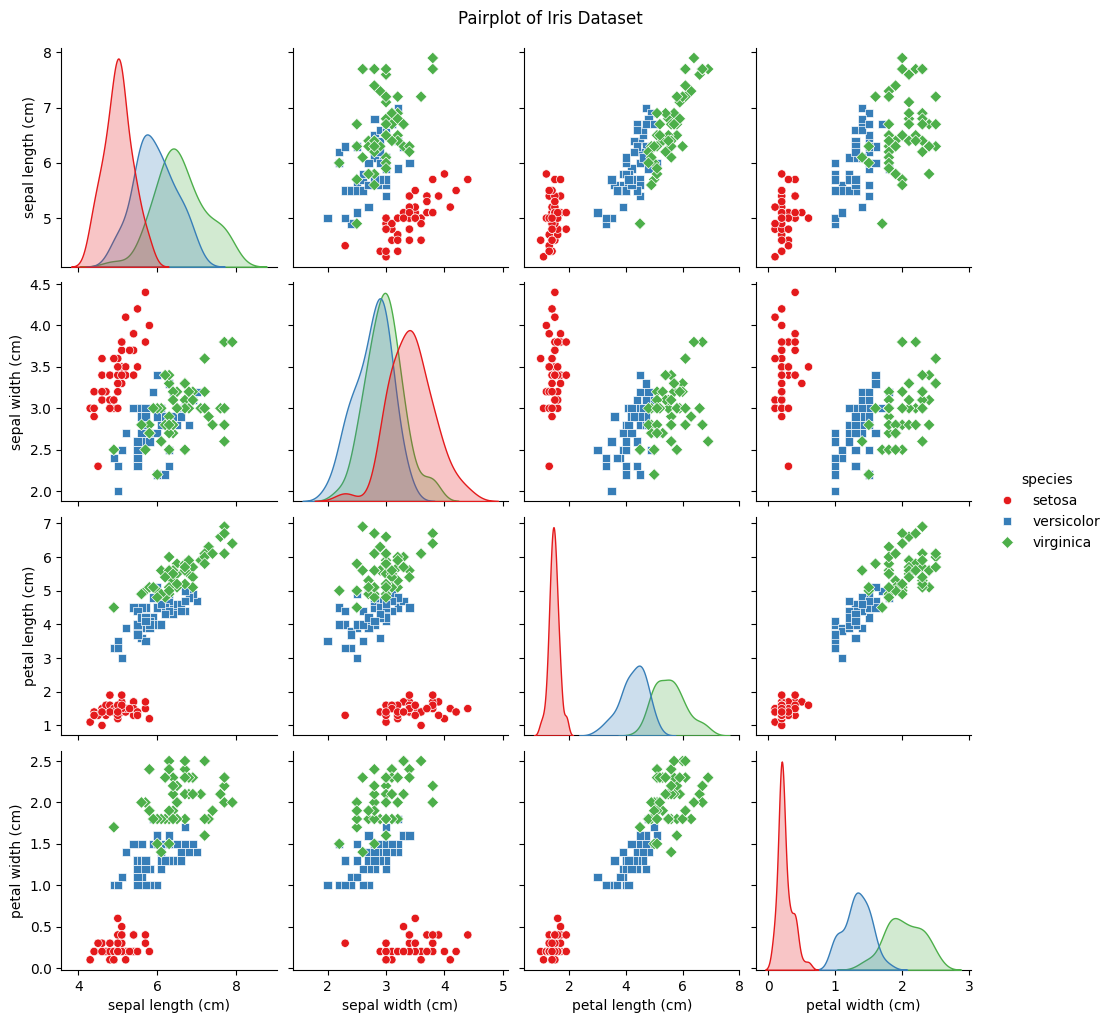

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette='Set1')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


Q3. Calculate the correlation matrix for the features in the Iris dataset. Which pair of features shows the  strongest positive correlation? Provide a heatmap to support your analysis.


The pair of features with the strongest positive correlation:
petal length (cm)  petal width (cm)    0.962865
dtype: float64


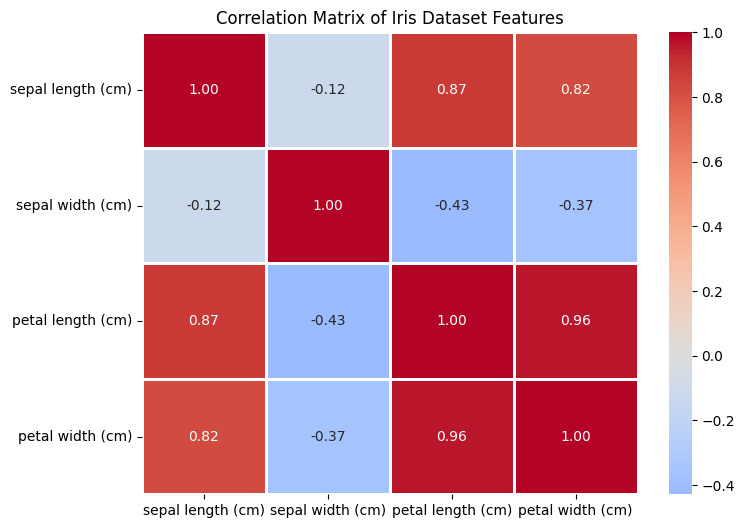

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
corr_matrix = df.corr()
max_corr_value = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
max_corr_value = max_corr_value[max_corr_value < 1].head(1)
print("The pair of features with the strongest positive correlation:")
print(max_corr_value)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


Q4. Create a scatterplot for petal length versus petal width and differentiate the points by species  using colors. What trends do you observe between these two features across different species? 5. Plot the distribution of sepal length for each species using boxplots. How does the distribution vary  between the three species?


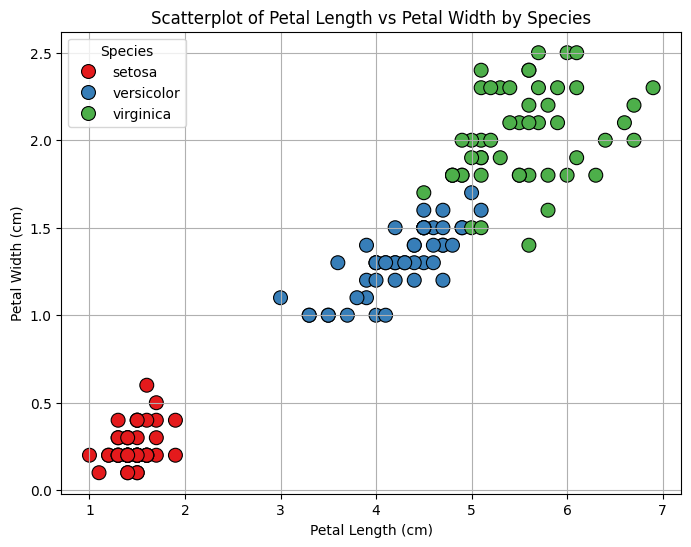

<ipython-input-4-680c8a8d3061>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='sepal length (cm)', palette='Set1')


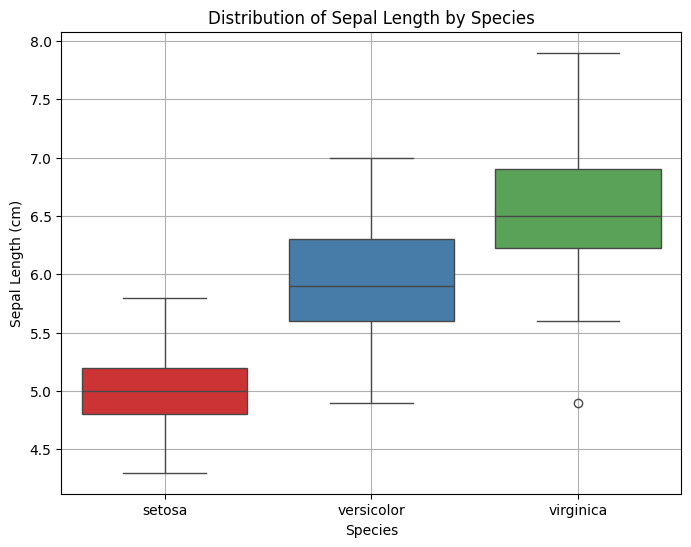

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1', s=100, edgecolor='k')
plt.title('Scatterplot of Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='sepal length (cm)', palette='Set1')
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.grid(True)
plt.show()
